## 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

In [7]:
# column_stack 함수: 전달받은 리스트를 차례대로 연결
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [13]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [21]:
# concatenate: 전달받은 리스트를 일렬로 연결
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target[:5]

array([1., 1., 1., 1., 1.])

## train/test split

In [25]:
from sklearn.model_selection import train_test_split

In [39]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42,
                                                                     stratify = fish_target) #샘플링 편향 해결

In [41]:
train_input.shape

(36, 2)

In [43]:
test_input.shape

(13, 2)

In [45]:
train_target

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

In [47]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

## 모델 훈련 by K-means

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
kn = KNeighborsClassifier()

In [54]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [56]:
kn.score(test_input, test_target)

1.0

In [60]:
# 새 데이터를 입력해 예측해보기 -> 도미(1)로 예측해야 정분류
kn.predict([[25,150]])

array([0.])

In [62]:
import matplotlib.pyplot as plt

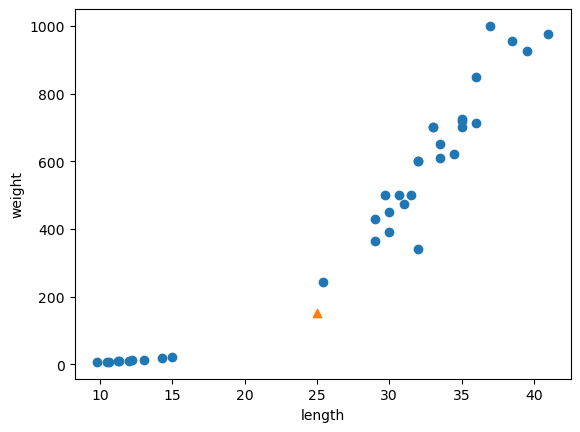

In [64]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [66]:
# 가장 가까운 이숭까지의 거리와 이웃 샘플의 인덱스 반환 (기본값 = 5)
distances , indexes = kn.kneighbors([[25, 150]])

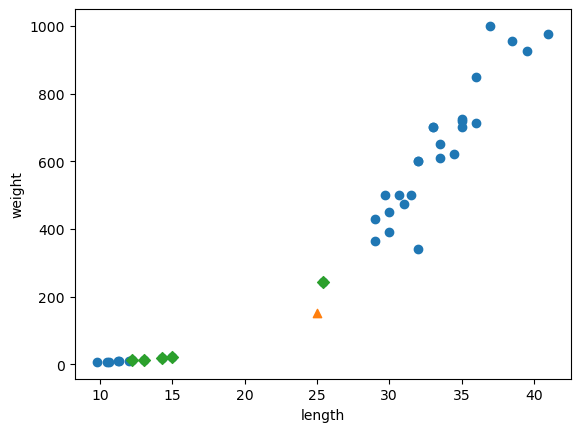

In [68]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [70]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [74]:
train_target[indexes]
# 가장 가까운 이웃들 중 도미(1)가 1, 빙어(0)가 4개이므로 빙어로 예측

array([[1., 0., 0., 0., 0.]])

In [76]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [78]:
# 산점도 상에서는 도미들의 데이터가 다른 빙어들의 데이터와 가까워 보임
# x축의 범위느 좁고,  y축의 범위는 넓어 y축으로 조금만 멀어져도 큰 값으로 계산

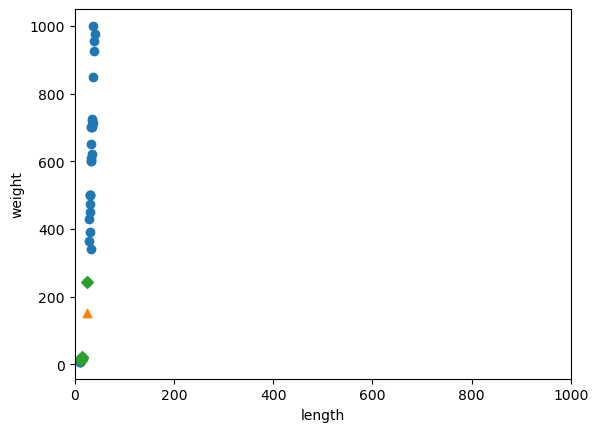

In [80]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000)) # x축의 범위 맞추기
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 데이터 전처리

In [85]:
# 특성마다 scale이 다르기 떄문에 이를 맞춰주는 게 필요
# 보통 표준점수 활용 - 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값

In [91]:
# 특성별 통계를 위해 axis = 0으로 지정 -> 각 열의 통계값 계산
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [93]:
mean

array([ 27.29722222, 454.09722222])

In [95]:
std

array([  9.98244253, 323.29893931])

In [97]:
train_scaled = (train_input - mean) / std

In [99]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [101]:
# 새로운 데이터도 똑같이 전처리 필요
new = ([25,150] - mean) / std

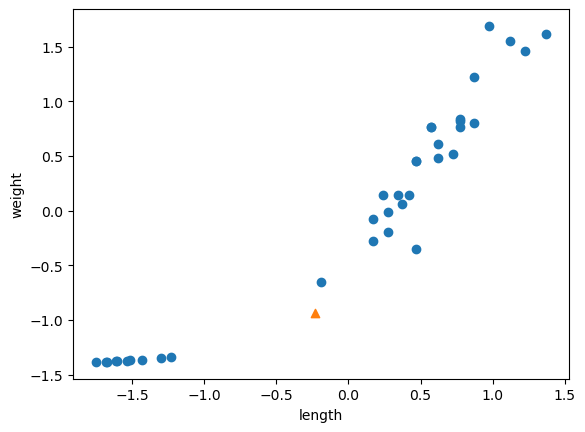

In [103]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker  ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [105]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [107]:
test_scaled = (test_input - mean) / std

In [111]:
kn.score(test_scaled, test_target)

1.0

In [117]:
kn.predict([new])

array([1.])

In [119]:
distances, indexes = kn.kneighbors([new])

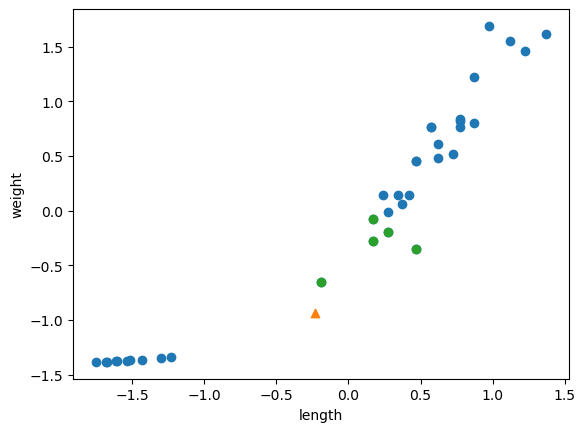

In [123]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker  ='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()